# Code for Worksheet 3

## Exercise 1.
Normally distributed multivariate random numbers 


### Ex1. a) Implement a way to generate normally distributed random vectors of dimensions 2, 5 and 10 with mean vector μ = 0 and covariance matrix Σ = I.

In [111]:
import numpy as np
from numpy.linalg import cholesky

def sample_vectors_normal_distribution(DIM, MEAN, COVARIANCE_MATRIX):
    # Sample Vector of random normal distribution (Mean = 0, variance = 1)
    X = np.random.normal(0, 1, DIM)

    # Cholesky descomposition step
    L = cholesky(COVARIANCE_MATRIX)
    z = (np.dot(L, X)) + MEAN

    return z
    
# Create for different dimensions
for dim in [2, 5, 10]:
    # Initialization of dimension, mean vector and covariance matrix
    DIM = dim
    MEAN = np.array([0] * DIM) # Mean = zero vector
    COVARIANCE_MATRIX = np.identity(DIM) # = Identity matrix

    print("Dimension:", dim)
    print(sample_vectors_normal_distribution(dim))
    print()


Dimension: 2


TypeError: sample_vectors_normal_distribution() missing 2 required positional arguments: 'MEAN' and 'COVARIANCE_MATRIX'

### Ex1. b) Use the random vector generator from 1 a) to create a sample set of random vectors. Estimate the parameters of the underlying normal distribution from this sample set. What do you observe? How accurate is your parameter estimate? What happens if the size of the sample set changes?

Dimension = 2
Estimated Mean: [-0.02205737 -0.00294286]
Esimated Covariance Matrix: [0.98957861 1.04825869]


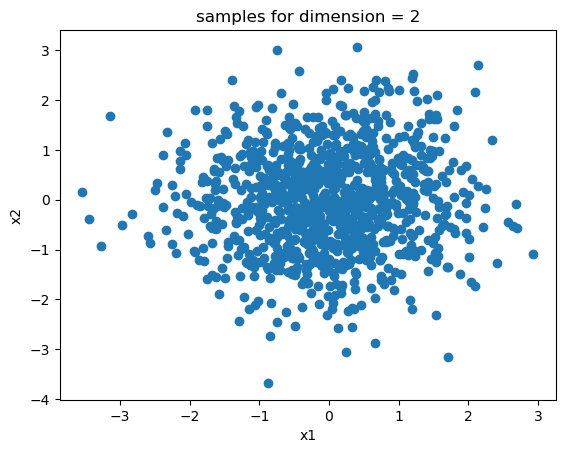


Estimating parameters for dimension = 5
Dimension = 5
Testing for sample_set size: 1000
Estimated Mean (should be 0): [ 0.04211569  0.02120688  0.00387569 -0.01121512 -0.00528006]
Estimated Covariance Matrix (should be 1): [1.00854997 0.9217327  0.96839776 0.97660369 1.00571146]

Dimension = 5
Testing for sample_set size: 100000
Estimated Mean (should be 0): [-0.00638125  0.00229062  0.00206249 -0.00371524 -0.00302308]
Estimated Covariance Matrix (should be 1): [0.99806624 1.00305208 1.0027895  1.00709506 0.99879023]

Dimension = 5
Testing for sample_set size: 500000
Estimated Mean (should be 0): [ 0.00087644 -0.00211581 -0.00129726  0.00169437 -0.00056357]
Estimated Covariance Matrix (should be 1): [1.00146353 0.99741855 1.000472   0.99998076 1.00124452]



In [112]:
from matplotlib import pyplot as plt

def create_sample_set(DIM, MEAN, COVARIANCE_MATRIX, size):
    print("Dimension =", DIM)
    sample_set = []
    for _ in range(size):
        sample_set.append(sample_vectors_normal_distribution(DIM, MEAN, COVARIANCE_MATRIX))
    sample_set = np.array(sample_set)

    return sample_set

def estimate_parameters(sample_set):
    # Estimate mean
    estimated_mean = 0
    for val in sample_set:
        estimated_mean += val
    estimated_mean = estimated_mean / sample_set.shape[0]
    estimated_mean = np.array(estimated_mean)
    # Estimate Covariance Matrix
    estimated_covariance_matrix = 0
    for val in sample_set:
        estimated_covariance_matrix += (val - estimated_mean) * (val - estimated_mean).T 
    estimated_covariance_matrix = estimated_covariance_matrix / sample_set.shape[0]
    estimated_covariance_matrix = np.array(estimated_covariance_matrix)

    return estimated_mean, estimated_covariance_matrix

def plot_2d_sample_set(sample_set):
    # Plot the sample_set for Dimension = 2
    plt.scatter(sample_set[:, 0], sample_set[:, 1])
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("samples for dimension = 2")
    plt.show()

DIM = 2
MEAN = np.array([0] * DIM) # Mean = zero vector
COVARIANCE_MATRIX = np.identity(DIM) # = Identity matrix
sample_set = create_sample_set(DIM = 2, MEAN = MEAN, COVARIANCE_MATRIX = COVARIANCE_MATRIX, size = 1000)
estimated_mean, estimated_covariance_matrix = estimate_parameters(sample_set)
print("Estimated Mean:", estimated_mean)
print("Esimated Covariance Matrix:", estimated_covariance_matrix)
plot_2d_sample_set(sample_set)
print()


# Question: Does it get more accurate when the size of the sample sets gets bigger?
DIM = 5 
MEAN = np.array([0] * DIM) # Mean = zero vector
COVARIANCE_MATRIX = np.identity(DIM) # = Identity matrix
print("Estimating parameters for dimension =", DIM)
for size in [1000, 100000, 500000]:
    sample_set = create_sample_set(DIM = DIM, MEAN = MEAN, COVARIANCE_MATRIX = COVARIANCE_MATRIX, size = size)
    estimated_mean, estimated_covariance_matrix = estimate_parameters(sample_set)
    print("Testing for sample_set size:", size)
    print("Estimated Mean (should be 0):", estimated_mean)
    print("Estimated Covariance Matrix (should be 1):", estimated_covariance_matrix)
    print()
 
    


### Ex1. c) Implement a way to generate normally distributed random vectors of different dimensions with mean vectors μ ̸= 0 and covariance matrices Σ ̸= I of your choice.

Positive definite matrix -> All Eigenvalues must be positive

MEAN = [2 5]
COVARIANCE_MATRIX = [[2.03379504 0.74124331]
 [0.74124331 0.64871648]]
Dimension = 2

Testing for sample_set size: 2000
Estimated Mean: [1.99051467 4.99317585] Actual Mean: [2 5]
Estimated diagonal of Covariance Matrix: [1.99140988 0.66160427]
Actual Covariance Matrix:
[[2.03379504 0.74124331]
 [0.74124331 0.64871648]]



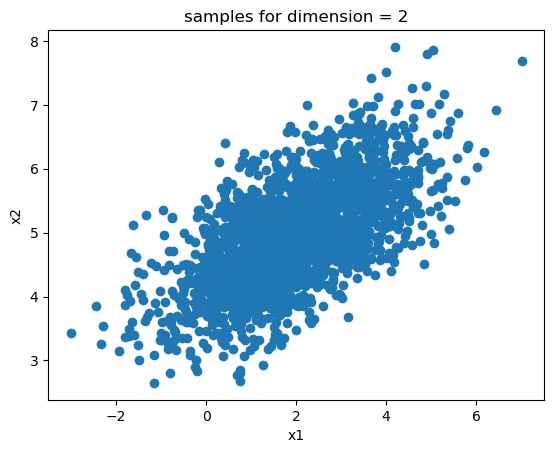

In [129]:
from sklearn.datasets import make_spd_matrix as generate_positive_definite_matrix # for creating positive definite matrices

DIM = 2
# Custom mean vector and covariance matrix
MEAN = np.array([2, 5])
COVARIANCE_MATRIX = generate_positive_definite_matrix(2)

print("MEAN =", MEAN)
print("COVARIANCE_MATRIX =", COVARIANCE_MATRIX)

SIZE = 2000
sample_set = create_sample_set(DIM, MEAN, COVARIANCE_MATRIX, SIZE)

print()
estimated_mean, estimated_covariance_matrix = estimate_parameters(sample_set)
print("Testing for sample_set size:", SIZE)
print("Estimated Mean:", estimated_mean, "Actual Mean:", MEAN)
print("Estimated diagonal of Covariance Matrix:", estimated_covariance_matrix)
print("Actual Covariance Matrix:")
print(COVARIANCE_MATRIX)
print()

plot_2d_sample_set(sample_set)


## Exercise 2

Basic Importance Sampling

### a) Given a set of N random numbers x that follow a standard normal distribution x ∼ N (0.0, 1.0).
### Estimate the probability that these random numbers satisfy the condition x < θ for any θ with and without Importance Sampling. Think about suitable Importance Sampling proposal functions.

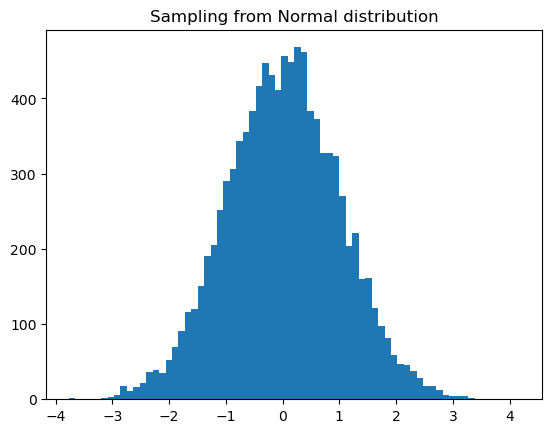

Integration (should be 0.5): 0.4908 ; upper bound: 0
Integration: 0.0 ; upper bound: -20
-> We see the problem, that there are not enough samples up to the upper bound -> Solution: Importance Sampling


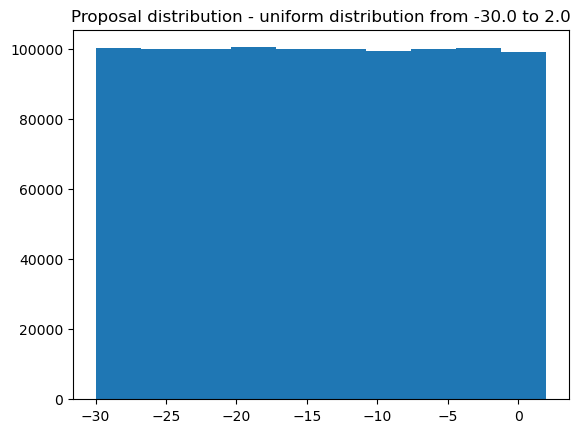

Size of proposal distributation samples: 1000000
Expectation for upper bound = 0 (should be 0.5): 4.314977180659618e+94


In [163]:
import numpy as np
from matplotlib import pyplot as plt

random_numbers = np.random.normal(0, 1, 10000)

plt.hist(random_numbers, bins=70)
plt.title("Sampling from Normal distribution")
plt.show()

def integrate_up_to(UPPER_BOUND):
    integration = 0
    for val in random_numbers:
        if val <= UPPER_BOUND:
            integration += 1
    integration = integration / len(random_numbers)

    return integration

UPPER_BOUND = 0
integration_0 = integrate_up_to(UPPER_BOUND)
print("Integration (should be 0.5):", integration_0, "; upper bound:", UPPER_BOUND)
UPPER_BOUND = -20
integration_0 = integrate_up_to(UPPER_BOUND)
print("Integration:", integration_0, "; upper bound:", UPPER_BOUND)
print("-> We see the problem, that there are not enough samples up to the upper bound -> Solution: Importance Sampling")

# Importance Sampling
SIZE_OF_PROPOSAL_DIST_SAMPLES = 1000000
proposal_dist = 32 * np.random.rand(SIZE_OF_PROPOSAL_DIST_SAMPLES) - 30 # uniform distribution from -30.0 to 2.0
plt.hist(proposal_dist)
plt.title("Proposal distribution - uniform distribution from -30.0 to 2.0")
plt.show()


def get_y_from_normal_dist(x):
    # Get y from normal distribution by inputing x
    return (1 / (np.sqrt(2 * np.pi))) * (np.e ** (-(1/2) * x) ** 2)

def get_y_from_uniform_dist(x, proposal_dist):
    # Get probability for x from uniform distribution (proposal distribution)
    unique, counts = np.unique(x, return_counts=True)
    counts_dict = dict(zip(unique, counts))
    return counts_dict[x]


# Calculate expectation for UPPER_BOUND = 0
expectation = 0
UPPER_BOUND = 0
for y in proposal_dist:
    lower_than_upper_bound = 0
    if y <= UPPER_BOUND:
        lower_than_upper_bound = 1

    f_theta_y = lower_than_upper_bound # whether random uniform number is below the limit bzw. threshhold

    p_y = get_y_from_normal_dist(y) # probability for random value from normal distribution

    q_y = get_y_from_uniform_dist(y, proposal_dist) # probability for random value from uniform distribution

    ### I don't get this formula yet
    expectation += f_theta_y * (p_y / q_y)
    
expectation = expectation / proposal_dist.shape[0]
print("Size of proposal distributation samples:", SIZE_OF_PROPOSAL_DIST_SAMPLES)
print("Expectation for upper bound = 0 (should be 0.5):", expectation)
    


In [8]:
import numpy as np

N = 100000
theta = -1

proposal = np.random.normal(theta, 1.0, N)

weights = np.exp(-0.5 * (proposal - theta)**2) / np.sqrt(2 * np.pi)

p = np.sum((x < theta) * weights) / np.sum(weights)

print("Estimation with Importance Sampling:", p)


Estimation with Importance Sampling: 0.16111788569844765


# Exercise 3

Circle area estimation using Importance Sampling